In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv(".\DATA\Mall_Customers.csv")
X = df.iloc[:,[-2, -1]].values

normalize = False
if normalize:
    sc = StandardScaler()
    X = sc.fit_transform(data)

print("Data split done!")

Data split done!


In [14]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [15]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37239.83554245604, 30273.394312070028, 25018.576334776328, 21850.16528258562, 19664.68519600554]


<function matplotlib.pyplot.show(close=None, block=None)>

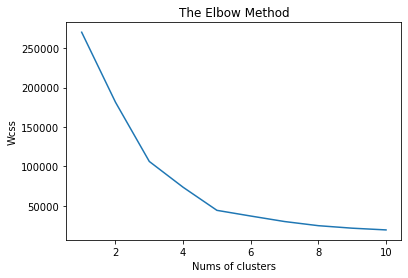

In [16]:
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Nums of clusters")
plt.ylabel("Wcss")
plt.show

In [17]:
kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [18]:
print(y_kmeans)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


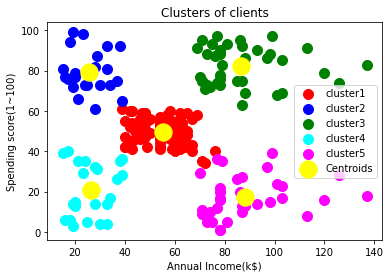

In [20]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c="red", label="cluster1")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c="blue", label="cluster2")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c="green", label="cluster3")
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c="cyan", label="cluster4")
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c="magenta", label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow", label="Centroids")
plt.title("Clusters of clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending score(1~100)")
plt.legend()
plt.show()